<a href="https://colab.research.google.com/github/ZacharySoo01/Quantifying-Uncertainty-in-LLMs-for-Medicine/blob/main/semantic_uncertainty/semantic_uncertainty/results/semantic_uncertainty_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Results
Like the examples below, input the wandb id as an argument in the restore_file() function, then get the results in the form of a dataframe with get_uncertainty_df()
* wandb id can be found in the hyperlink when clicking on a run in wandb: https://wandb.ai/zacharysoo01-university-of-texas-/semantic_uncertainty/runs/nk8xi33a?nw=nwuserzacharysoo01 --> in this example, nk8xi33a is the wandb id
* If running for the first time, please provide your api key

In [1]:
%load_ext autoreload
%autoreload 2

import os
import json
import wandb
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Helper Functions

def restore_file(wandb_id, filename='wandb-summary.json'):
    files_dir = 'notebooks/restored_files'
    os.system(f'mkdir -p {files_dir}')

    api = wandb.Api()
    run = api.run(f'semantic_uncertainty/{wandb_id}')

    path = f'{files_dir}/{filename}'
    os.system(f'rm -rf {path}')
    run.file(filename).download(root=files_dir, replace=True, exist_ok=False)
    with open(path, 'r') as f:
        out = json.load(f)
    return out

def get_uncertainty_df(metrics):
    data = []
    for method in metrics['uncertainty']:
        for metric in metrics['uncertainty'][method]:
            mean = metrics['uncertainty'][method][metric]['mean']
            data.append([method, metric, mean])
    df = pd.DataFrame(data, columns=['method', 'metric', 'means'])
    main_methods = ['semantic_entropy', 'cluster_assignment_entropy', 'regular_entropy', 'p_false', 'p_ik']
    df = df.set_index('method').loc[main_methods].reset_index()
    main_names = ['Semantic entropy', 'Discrete Semantic Entropy', 'Naive Entropy', 'p(True)', 'Embedding Regression']
    conversion = dict(zip(main_methods, main_names))
    df['method'] = df.method.map(lambda x: conversion[x])
    return df

def plot_results(wandb_id, title=""):
    results = restore_file(wandb_id)
    unc_df = get_uncertainty_df(results)
    metric = 'AUROC'
    unc_df.set_index('metric').loc[metric].plot.bar(x='method', y='means')
    plt.gca().set_title(title)
    plt.gca().set_ylabel(metric)
    plt.gca().grid(axis='y')

# My Results

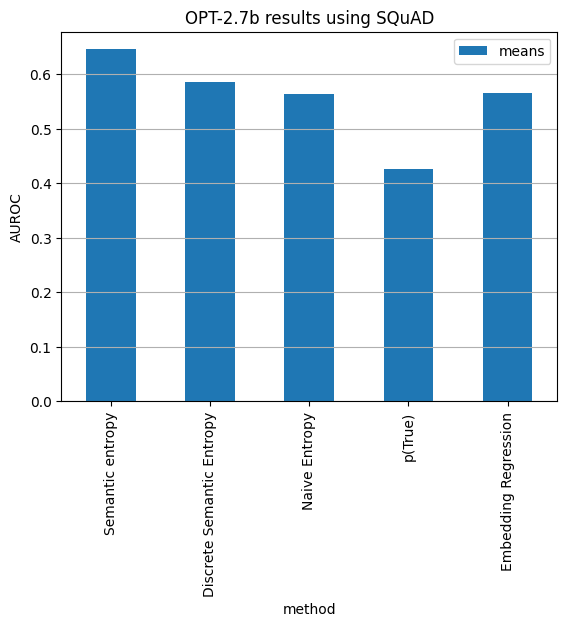

In [3]:
# opt
plot_results("nk8xi33a", title="OPT-2.7b results using SQuAD")

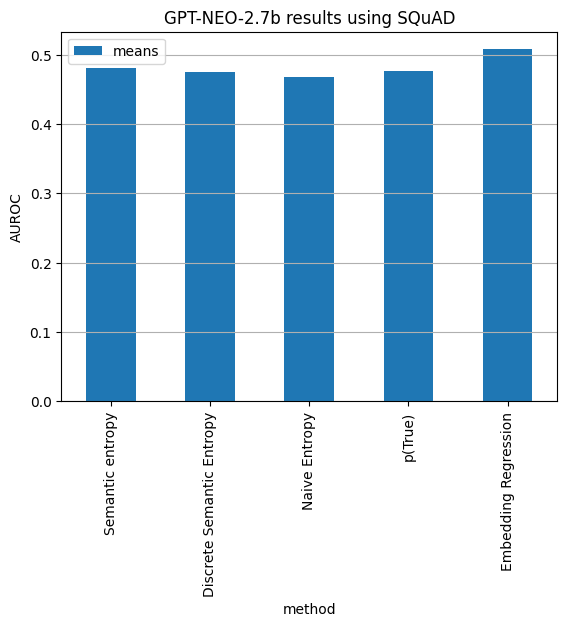

In [4]:
# gpt-neo
plot_results("25z1uwvx", title="GPT-NEO-2.7b results using SQuAD")

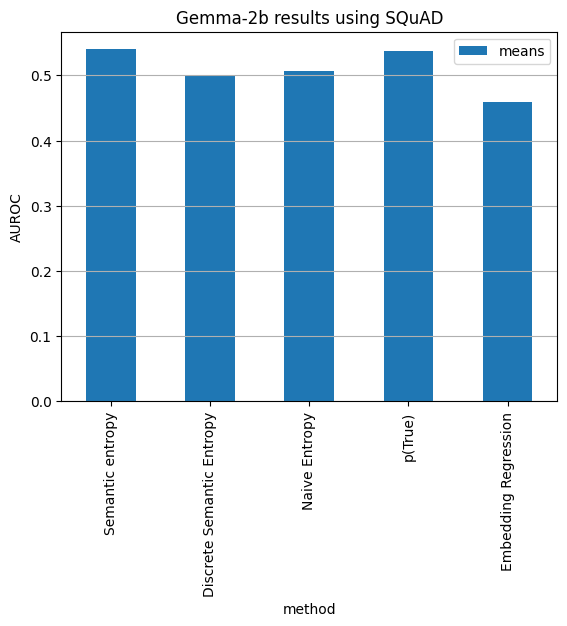

In [5]:
# gemma
plot_results("mcbqxfke", title="Gemma-2b results using SQuAD")

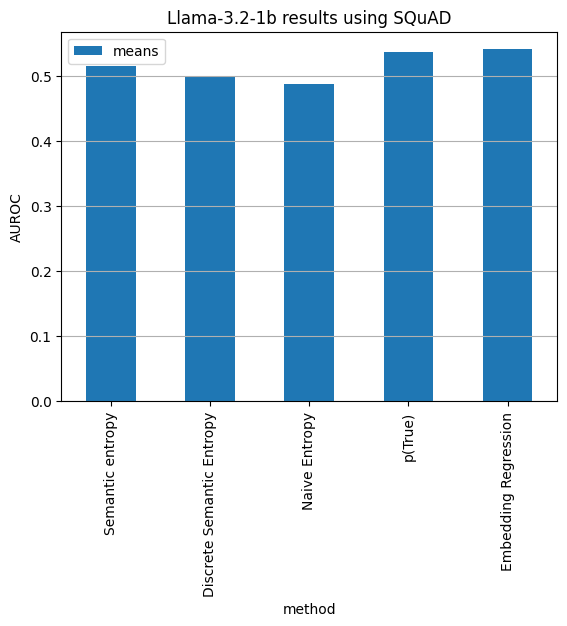

In [6]:
# llama 3.2
plot_results("tivbsl6w", title="Llama-3.2-1b results using SQuAD")

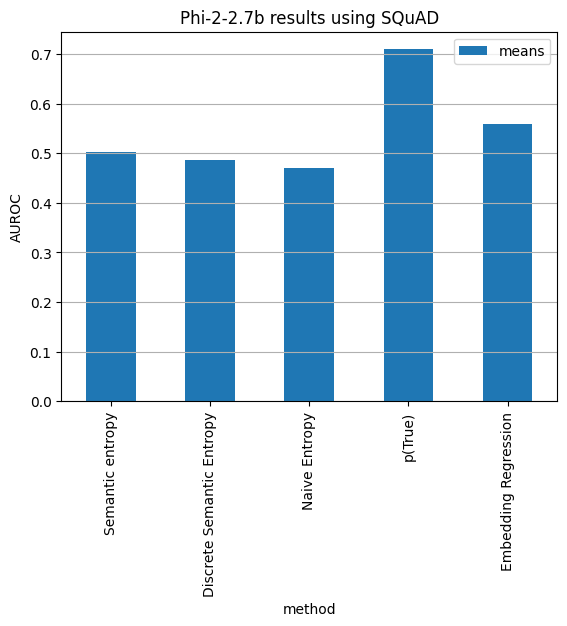

In [7]:
# phi-2
plot_results("184v38e8", title="Phi-2-2.7b results using SQuAD")